In [1]:
datadir='/dls/i16/data/2018/cm19668-2/'

import sys
sys.path
sys.path.append('/dls_sw/apps/scisoftpy/2.7')
sys.path.append('/dls_sw/i16/software/python')

#%matplotlib nbagg

from matplotlib.pyplot import *

from numpy import *
#from dlstools.quickfit import *
#from dlstools.dirty_fit import fit
from dlstools import dataloader
d=dataloader.dlsloader(datadir+'%i.dat')
p=dataloader.tiffloader(d, lambda obj: datadir+obj.pilatus2m_path_template)
psnap=dataloader.tiffloader(datadir+'snapped-data/pilatus2M/'+'%05i.tif')



=== Importing dlstools package
=== Need to obtain specfilewrapper.py and compatible specfile.so from ERSF PyMCA package in order to load spec files


/dls_sw/apps/scisoftpy/2.7/scisoftpy/_external/tifffile.py:284: UserWarning: ImportError: No module named '_tifffile'. Loading of some compressed images will be very slow. Tifffile.c can be obtained at http://www.lfd.uci.edu/~gohlke/
  "ImportError: No module named '_tifffile'. "
Could not import plotting routines
No module named py4j.java_gateway


In [2]:
#modified function to use ABAB cycle
def im_diff_sum(scans, minfrac):
    import sys

    d(scans[0]); p(1); im_pos_sum=p.image_01*0; im_neg_sum=p.image_01*0;

    for scan in scans:
        d(scan); plot(d.sum)
        min_sum_threshold=minfrac*d.sum[0]
        cycle=0

        ncycles=len(d.sum)/4
        for i in range(ncycles):
            imlist=[]; Vdemlist=[]; bad=False
            for j in range(4):
                sys.stdout.write(str(i*4+j)+'\r')
                p(d.path[i*4+j]);  imlist+=[p.image_01];  
                #Vdemlist+=[d.Vdem[i*4+j]]
                Vdemlist+=[d.x22_anout[i*4+j]] 
                if d.sum[i*4+j]<min_sum_threshold:
                    bad=True; #print "======  bad one ========"
            #print Vdemlist, bad
            if bad==False:
                #im_pos_sum+=imlist[0]+imlist[3]
                #im_neg_sum+=imlist[1]+imlist[2]
                im_pos_sum+=imlist[0]+imlist[2]# keep changes to minumum from ABBA version
                im_neg_sum+=imlist[1]+imlist[3]          
                
                cycle+=1        
        print "=== Good cycles: %i Total: %i" % (cycle, ncycles)       
    return(im_pos_sum, im_neg_sum)


def array_shrink(array_old, ifac, jfac):
    #add array elements in ifac x jfac blocks to make smaller array
    ilen, jlen = array_old.shape
    inew, jnew = ilen/ifac, jlen/jfac
    array_new=zeros([inew, jnew])
    #print inew, jnew, array_new
    for i in range(inew):
        for j in range(jnew):
            for isum in range(ifac):
                for jsum in range(jfac):
                    array_new[i,j]=sum(array_old[i*ifac:(i+1)*ifac, j*jfac:(j+1)*jfac])
    return array_new


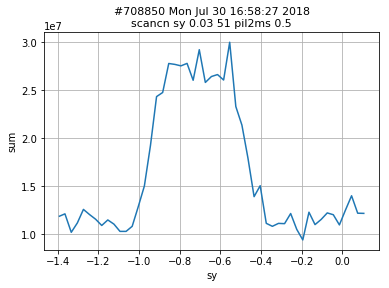

In [3]:
d(708850)
d.plot('sy','sum')

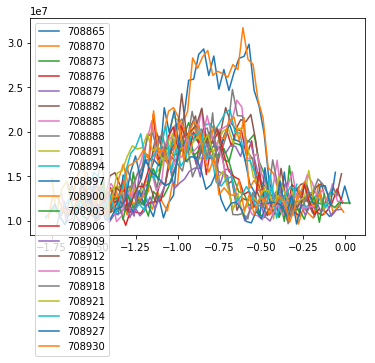

In [4]:
#only two good ones!
#d(708873)
figure()
for yscan in [708865]+range(708870,708931,3):
    d(yscan)
    plot(d.sy,d.sum, label=str(yscan))
legend()

In [5]:
### liquid drained out after first few scans
lastgood=708876
#en1340=[708866] + range(708871,lastgood+1,3)
en1340=[708866, 708871]
#en1360=[708851, 708853, 708867] + range(708872,lastgood+1,3)
en1360=[708851, 708853, 708867, 708872]
#(im_pos_sum, im_neg_sum)=im_diff_sum([708866], 0.9)
print en1340
print en1360

[708866, 708871]
[708851, 708853, 708867, 708872]


scan: 708866	energy: 13.40
=== Good cycles: 75 Total: 75


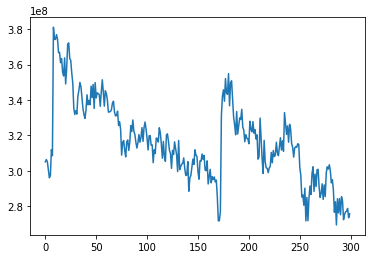

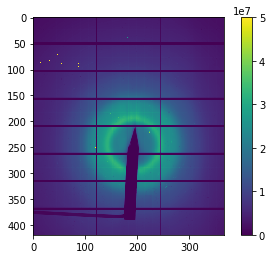

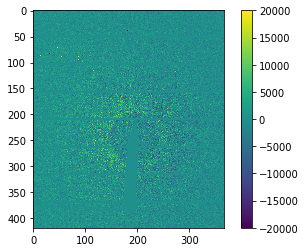

In [6]:
#multiple plots blank - ok individually -remove interactive (or not!)

scan = 708866
d(scan)
print "scan: %i\tenergy: %.2f" % (scan, d.en)

(im_pos_sum, im_neg_sum) = im_diff_sum([scan], 0.1)
    
im_sum,  im_diff = im_pos_sum + im_neg_sum, im_pos_sum - im_neg_sum
new_sum, new_diff = array_shrink(im_sum,4,4), array_shrink(im_diff,4,4)

figure()
imshow(new_sum); clim([0,0.5e8]); colorbar()

figure()
imshow(new_diff); clim([-2e4, 2e4]); colorbar()

scan: 708871	energy: 13.40
=== Good cycles: 71 Total: 75


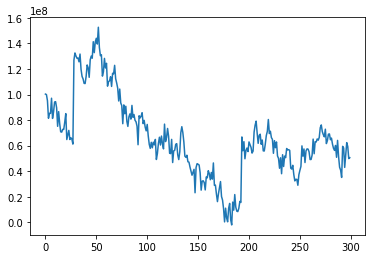

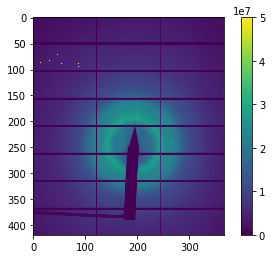

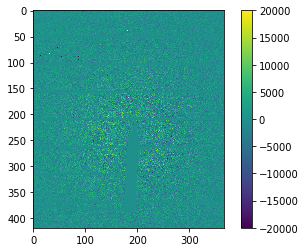

In [7]:
#multiple plots blank - ok individually -remove interactive (or not!)

scan = 708871
d(scan)
print "scan: %i\tenergy: %.2f" % (scan, d.en)

(im_pos_sum, im_neg_sum) = im_diff_sum([scan], 0.1)
    
im_sum,  im_diff = im_pos_sum + im_neg_sum, im_pos_sum - im_neg_sum
new_sum, new_diff = array_shrink(im_sum,4,4), array_shrink(im_diff,4,4)

figure()
imshow(new_sum); clim([0,0.5e8]); colorbar()

figure()
imshow(new_diff); clim([-2e4, 2e4]); colorbar()

scan: 708851	energy: 13.60
=== Good cycles: 75 Total: 75


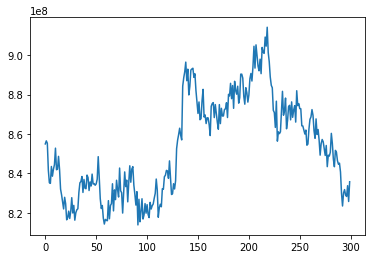

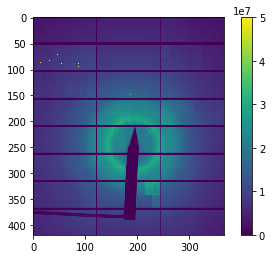

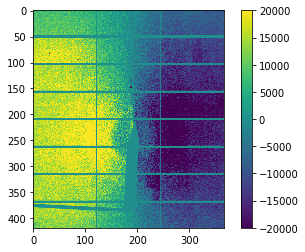

In [8]:
#multiple plots blank - ok individually -remove interactive (or not!)

scan = 708851
d(scan)
print "scan: %i\tenergy: %.2f" % (scan, d.en)

(im_pos_sum, im_neg_sum) = im_diff_sum([scan], 0.1)
    
im_sum,  im_diff = im_pos_sum + im_neg_sum, im_pos_sum - im_neg_sum
new_sum, new_diff = array_shrink(im_sum,4,4), array_shrink(im_diff,4,4)

figure()
imshow(new_sum); clim([0,0.5e8]); colorbar()

figure()
imshow(new_diff); clim([-2e4, 2e4]); colorbar()

scan: 708853	energy: 13.60
=== Good cycles: 75 Total: 75


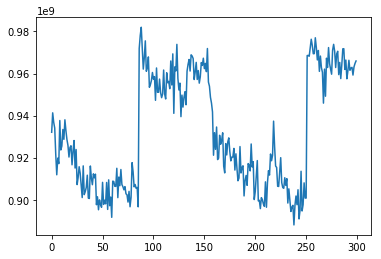

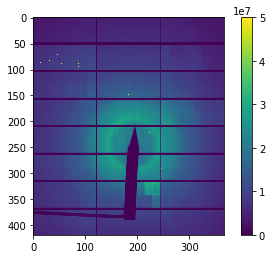

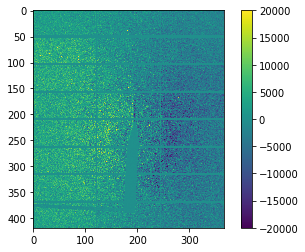

In [9]:
#multiple plots blank - ok individually -remove interactive (or not!)

scan = 708853
d(scan)
print "scan: %i\tenergy: %.2f" % (scan, d.en)

(im_pos_sum, im_neg_sum) = im_diff_sum([scan], 0.1)
    
im_sum,  im_diff = im_pos_sum + im_neg_sum, im_pos_sum - im_neg_sum
new_sum, new_diff = array_shrink(im_sum,4,4), array_shrink(im_diff,4,4)

figure()
imshow(new_sum); clim([0,0.5e8]); colorbar()

figure()
imshow(new_diff); clim([-2e4, 2e4]); colorbar()

scan: 708867	energy: 13.60
=== Good cycles: 75 Total: 75


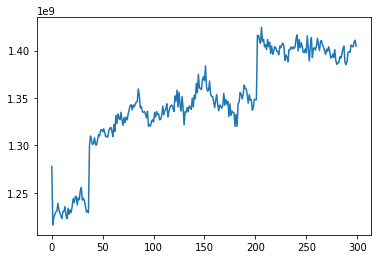

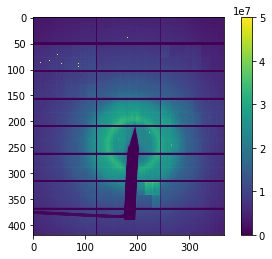

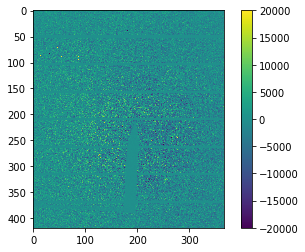

In [10]:
#multiple plots blank - ok individually -remove interactive (or not!)

scan = 708867
d(scan)
print "scan: %i\tenergy: %.2f" % (scan, d.en)

(im_pos_sum, im_neg_sum) = im_diff_sum([scan], 0.1)
    
im_sum,  im_diff = im_pos_sum + im_neg_sum, im_pos_sum - im_neg_sum
new_sum, new_diff = array_shrink(im_sum,4,4), array_shrink(im_diff,4,4)

figure()
imshow(new_sum); clim([0,0.5e8]); colorbar()

figure()
imshow(new_diff); clim([-2e4, 2e4]); colorbar()

scan: 708872	energy: 13.60
=== Good cycles: 39 Total: 75


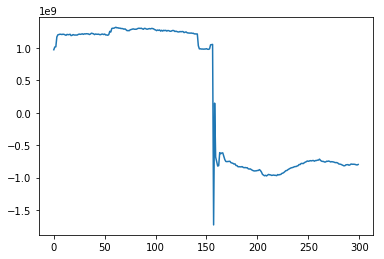

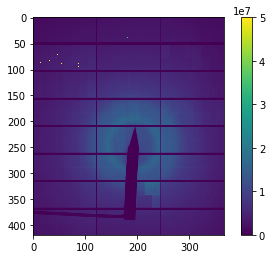

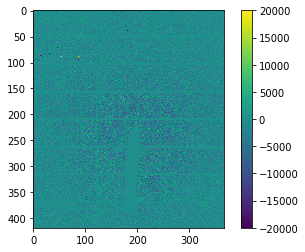

In [11]:
#multiple plots blank - ok individually -remove interactive (or not!)

scan = 708872
d(scan)
print "scan: %i\tenergy: %.2f" % (scan, d.en)

(im_pos_sum, im_neg_sum) = im_diff_sum([scan], 0.1)
    
im_sum,  im_diff = im_pos_sum + im_neg_sum, im_pos_sum - im_neg_sum
new_sum, new_diff = array_shrink(im_sum,4,4), array_shrink(im_diff,4,4)

figure()
imshow(new_sum); clim([0,0.5e8]); colorbar()

figure()
imshow(new_diff); clim([-2e4, 2e4]); colorbar()

In [12]:
for scan in range(708865,708877+1):
    print d(scan), len(d.sum), d.en

#708865  sy kphi kap kth kmu kdelta kgam delta_axis_offset TimeSec ic1monitor rc count_time path maxx maxy maxval sum metadata 51 13.6
#708866  x x22_anout ic1 kphi kap kth kmu kdelta kgam delta_axis_offset TimeSec ic1monitor rc count_time path maxx maxy maxval sum metadata 300 13.4
#708867  x x22_anout ic1 kphi kap kth kmu kdelta kgam delta_axis_offset TimeSec ic1monitor rc count_time path maxx maxy maxval sum metadata 300 13.6
#708868  sy kphi kap kth kmu kdelta kgam delta_axis_offset TimeSec ic1monitor rc count_time path maxx maxy maxval sum metadata 51 13.6
#708869  x x22_anout ic1 kphi kap kth kmu kdelta kgam delta_axis_offset TimeSec ic1monitor rc count_time path maxx maxy maxval sum metadata 66 13.4
#708870  sy kphi kap kth kmu kdelta kgam delta_axis_offset TimeSec ic1monitor rc count_time path maxx maxy maxval sum metadata 51 13.6
#708871  x x22_anout ic1 kphi kap kth kmu kdelta kgam delta_axis_offset TimeSec ic1monitor rc count_time path maxx maxy maxval sum metadata 300 13.4
